## Openebench_gmi


In [5]:
import json
import numpy as np
in_file = '../datasets/benchmark_data/participant_matrix.json'
with open(in_file) as json_file:  
    data = json.load(json_file)

In [6]:
participants = data['participants']
p_matrix_values = np.array(data['matrix']['values'])
p_matrix_values

array([[0.        , 0.        , 0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        ]])

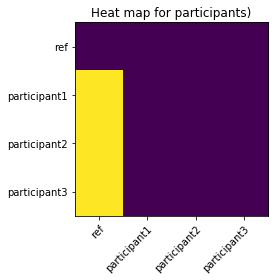

In [8]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(p_matrix_values)


# We want to show all ticks...
ax.set_xticks(np.arange(len(participants)))
ax.set_yticks(np.arange(len(participants)))
# ... and label them with the respective list entries
ax.set_xticklabels(participants)
ax.set_yticklabels(participants)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(p_matrix_values)):
#    for j in range(len(p_matrix_values)):
#        text = ax.text(j, i, harvest[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("Heat map for participants)")
fig.tight_layout()
plt.show()